## Machine Learning - 
### Project - Predicting House Prices

### Tasks:
    - Load the dataset and perform basic data exploration.
    
    - Identify features and target variable.
    
    - Split the dataset into training and testing sets.
    
    - Use at least two supervised machine learning models (e.g., Linear Regression, Decision Tree) to predict the house prices.
    
    - Evaluate the performance of your models using metrics like RMSE, R-squared, etc


## Data Dictionary
1. ID-----------  id
2. CRIM---------      per capita crime rate by town
3. ZN-----------        proportion of residential land zoned for lots over 25,000 sq.ft.
4. INDUS--------     proportion of non-retail business acres per town
5. CHAS---------      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
6. NOX----------       nitric oxides concentration (parts per 10 million)
7. RM-----------        average number of rooms per dwelling
8. AGE----------       proportion of owner-occupied units built prior to 1940
9. DIS----------       weighted distances to five Boston employment centres
10. RAD----------       index of accessibility to radial highways
11. TAX---------      full-value property-tax rate per #10,000
12. PTRATIO-----  pupil-teacher ratio by town
13. BLACK-----------       1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
14. LSTAT-------    % lower status of the population
15. MEDV--------     Median value of owner-occupied homes in #1000's



## Data Gathering - Loading the Dataset

In [1]:
#Load the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
# Load the train dataset
df = pd.read_csv('C:/Users/shbel/TECHIE/Women-in-Data-Science-WiDS-Nigeria-mentorship-program/Housing_Data.csv')

In [3]:
#view the dataset
df.head(10)

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222     18.7   
5  0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222     18.7   
6  0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311     15.2   
7  0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311     15.2   
8  0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311     15.2   
9  0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311     15.2   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
5  394.12   5.21  28.7  
6  395.60  12.43  22.9  
7  396.90  19.15  27.1  
8  386.63  29.93  16.5  
9  386.71  17.10  18.9

In [4]:
column_header = [
    "crim",
    "zn",
    "indus",
    "chas",
    "nox",
    "rm",
    "age",
    "dis",
    "rad",
    "tax",
    "ptratio",
    "black",
    "lstat",
    "medv"
]

df.columns = column_header
df.head()

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2

In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [7]:
df.describe().transpose()

count        mean         std        min         25%        50%  \
crim     506.0    3.613524    8.601545    0.00632    0.082045    0.25651   
zn       506.0   11.363636   23.322453    0.00000    0.000000    0.00000   
indus    506.0   11.136779    6.860353    0.46000    5.190000    9.69000   
chas     506.0    0.069170    0.253994    0.00000    0.000000    0.00000   
nox      506.0    0.554695    0.115878    0.38500    0.449000    0.53800   
rm       506.0    6.284634    0.702617    3.56100    5.885500    6.20850   
age      506.0   68.574901   28.148861    2.90000   45.025000   77.50000   
dis      506.0    3.795043    2.105710    1.12960    2.100175    3.20745   
rad      506.0    9.549407    8.707259    1.00000    4.000000    5.00000   
tax      506.0  408.237154  168.537116  187.00000  279.000000  330.00000   
ptratio  506.0   18.455534    2.164946   12.60000   17.400000   19.05000   
black    506.0  356.674032   91.294864    0.32000  375.377500  391.44000   
lstat    506.0   12.653063    7.141062    1.73000    6.950000   11.36000   
medv     506.0   22.532806    9.197104    5.00000   17.025000   21.20000   

                75%       max  
crim       3.677083   88.9762  
zn        12.500000  100.0000  
indus     18.100000   27.7400  
chas       0.000000    1.0000  
nox        0.624000    0.8710  
rm         6.623500    8.7800  
age       94.075000  100.0000  
dis        5.188425   12.1265  
rad       24.000000   24.0000  
tax      666.000000  711.0000  
ptratio   20.200000   22.0000  
black    396.225000  396.9000  
lstat     16.955000   37.9700  
medv      25.000000   50.0000

In [8]:
# Find duplicate values
df.duplicated().sum()

0

## Exploratory Data Analysis

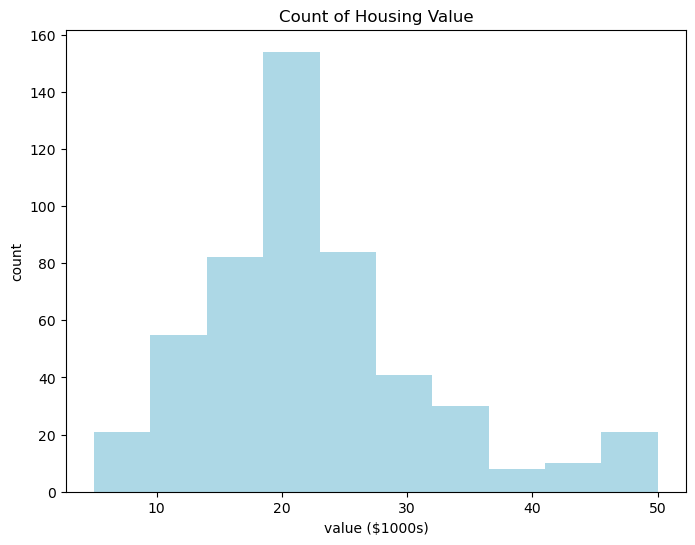

In [9]:
#Distribution of the target variable
plt.figure(figsize=(8, 6));
plt.hist(df['medv'], color='lightblue');
plt.title('Count of Housing Value');
plt.xlabel('value ($1000s)');
plt.ylabel('count');
plt.show();

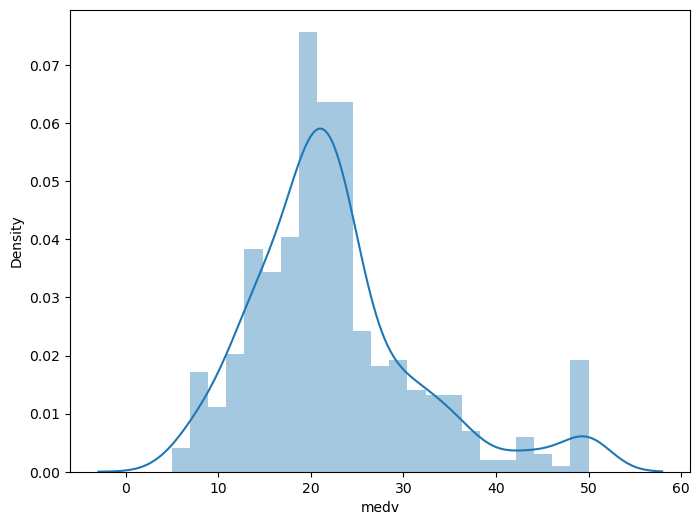

In [10]:
plt.figure(figsize=(8, 6));
sns.distplot(df['medv']);

<Axes: xlabel='age'>

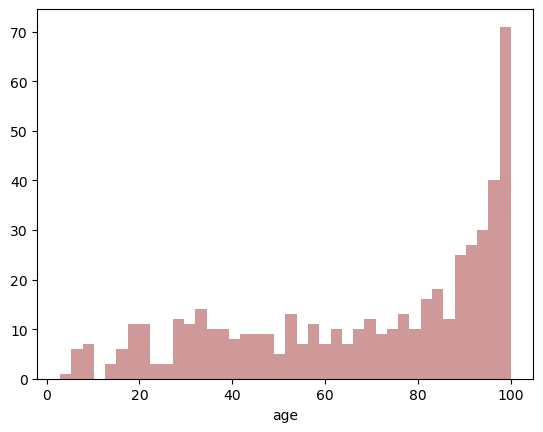

In [11]:
sns.distplot(df['age'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='crim'>

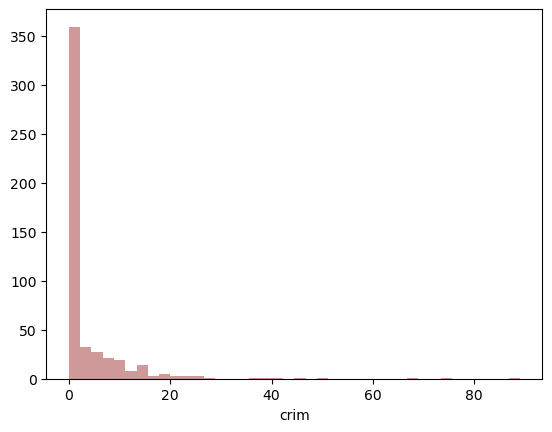

In [12]:
sns.distplot(df['crim'].dropna(),kde=False,color='darkred',bins=40)

<Axes: xlabel='rm'>

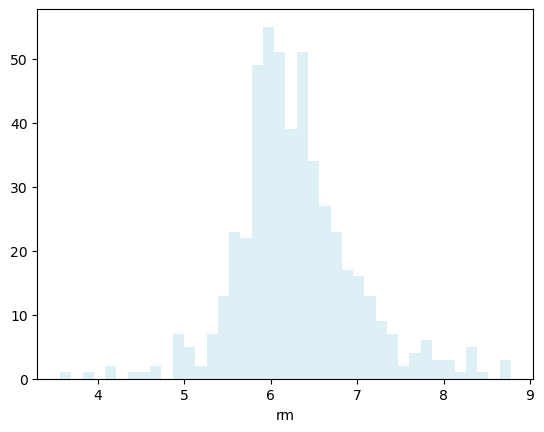

In [13]:
sns.distplot(df['rm'].dropna(),kde=False,color='lightblue',bins=40)

<Axes: xlabel='chas', ylabel='count'>

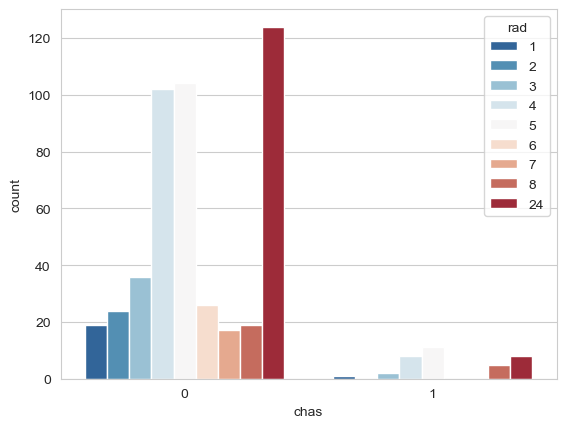

In [14]:
sns.set_style('whitegrid')
sns.countplot(x='chas',hue='rad',data=df,palette='RdBu_r')

<Axes: xlabel='chas', ylabel='count'>

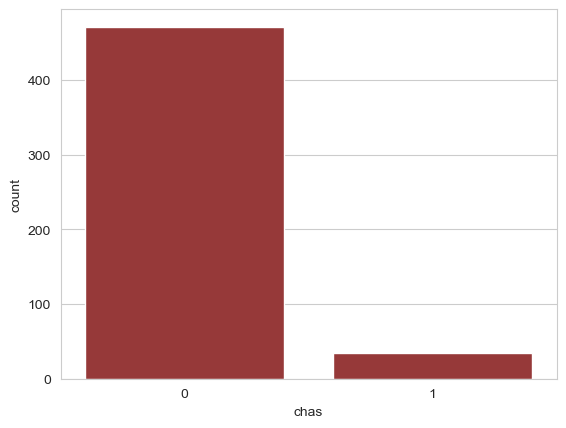

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='chas',data=df, color='brown')

<Axes: xlabel='rad', ylabel='count'>

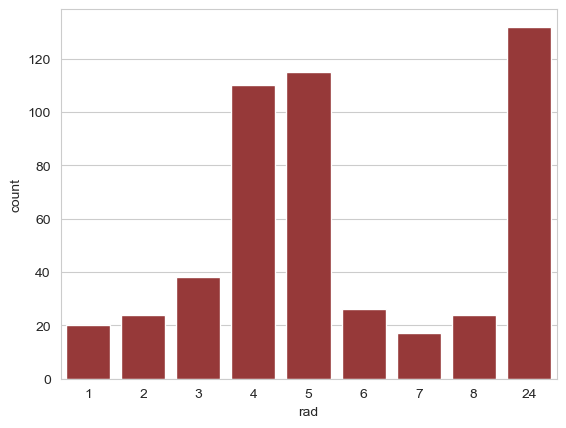

In [16]:
sns.set_style('whitegrid')
sns.countplot(x='rad',data=df, color= 'brown')

## Correlation

In [17]:
#corelation between columns
corr_matrix = df.corr()

In [18]:
#here we see the correlation of other features with Price
corr_matrix['medv'].sort_values(ascending=False)

medv       1.000000
rm         0.695360
zn         0.360445
black      0.333461
dis        0.249929
chas       0.175260
age       -0.376955
rad       -0.381626
crim      -0.388305
nox       -0.427321
tax       -0.468536
indus     -0.483725
ptratio   -0.507787
lstat     -0.737663
Name: medv, dtype: float64

###### The first 5 column have positive correlation while the others have negative correlation

<Axes: >

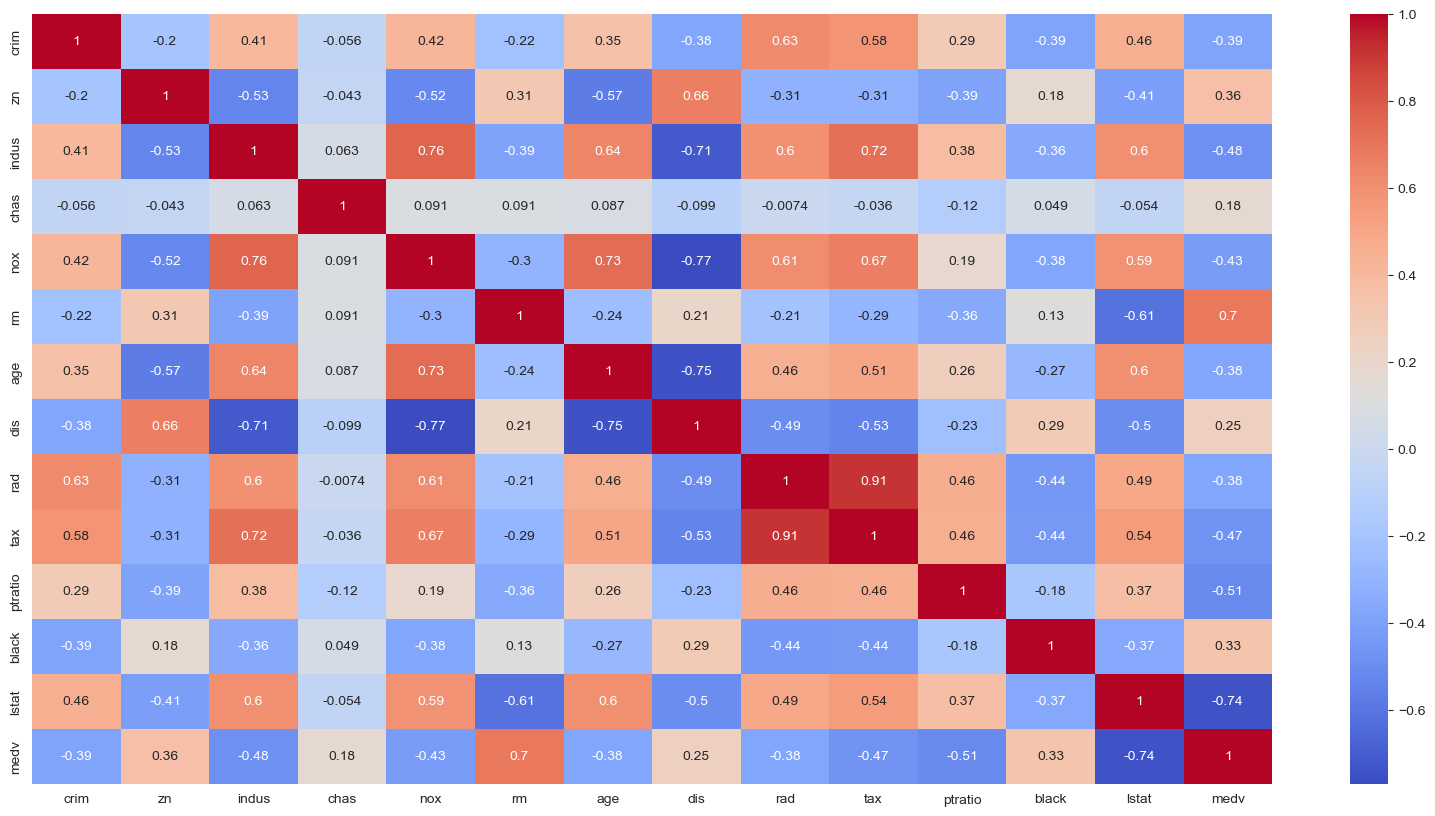

In [19]:
#plotting the heatmap of correlation between features

corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')


## Model - Linear Regression

In [20]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [21]:
X = df.iloc[:,0:13]
y = df.iloc[:,-1]

In [22]:
X

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio   black  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3       18.7  394.63   2.94  
4       18.7  396.90   5.33  
..       ...     ...    ...  
501     21.0  391.99   9.67  
502     21.0  396.90   9.08  
503     21.0  396.90   5.64  
504     21.0  393.45   6.48  
505     21.0  396.90   7.88  

[506 rows x 13 columns]

In [23]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [24]:
# Splitting the dataset to training and testing data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [25]:
model = LinearRegression()#create the model
model.fit(X_train,y_train)#fit the model

LinearRegression()

In [26]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [27]:
#Accuracy of model
regTrain_score=model.score(X_train,y_train)*100
regTest_score=model.score(X_test,y_test)*100

print("Training Accuracy : ",regTrain_score)
print("Testing Accuracy : ",regTest_score)

Training Accuracy :  76.4545102694255
Testing Accuracy :  67.33825506400176


In [28]:
# RMSE & R2 score for model evaluation 
reg_mse = metrics.mean_squared_error(y_test, y_pred) 
reg_rmse = np.sqrt(reg_mse)
reg_r2 = round(model.score(X_train, y_train),2)
 
print("Root Mean Square Error : ", reg_rmse) 
print("R2 : ", reg_r2) 

Root Mean Square Error :  5.21497514537542
R2 :  0.76


## Model - Decision Tree 

In [29]:
# Fitting the Decision Tree Regression Model to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor_dt = DecisionTreeRegressor(random_state = 0)
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [30]:
# Create a decision tree regressor
dc_regressor = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
dc_regressor.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dc_regressor.predict(X_test)

In [31]:
#Accuracy of model
dcTrain_score = dc_regressor.score(X_train,y_train)*100
dcTest_score = dc_regressor.score(X_test,y_test)*100

print("Training Accuracy : ",dcTrain_score)
print("Testing Accuracy : ",dcTest_score)

Training Accuracy :  100.0
Testing Accuracy :  66.68662040861881


In [32]:
# Evaluate the model
dc_mse = mean_squared_error(y_test, y_pred)
dc_rmse = np.sqrt(dc_mse)
dc_r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error: {dc_rmse}')
print(f'R-squared Score: {dc_r2}')

Root Mean Squared Error: 5.266740228222666
R-squared Score: 0.666866204086188


In [33]:
models = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'Training Accuracy': [regTrain_score, dcTrain_score],
    'Testing Accuracy': [regTest_score, dcTest_score],
    'RMSE Score': [reg_rmse, dc_rmse],
    'R-squared Score': [reg_r2, dc_r2]})
models.sort_values(by='R-squared Score', ascending=False)

Model  Training Accuracy  Testing Accuracy  RMSE Score  \
0  Linear Regression           76.45451         67.338255    5.214975   
1      Decision Tree          100.00000         66.686620    5.266740   

   R-squared Score  
0         0.760000  
1         0.666866